# Table of Contents
* [World Bank Data Analysis: Income Inequality](#World-Bank-Data-Analysis:-Income-Inequality)
* [Selected Indices from 1980-2010](#Selected-Indices-from-1980-2010)
* [Exploratory Analysis](#Exploratory-Analysis)
	* [Clean up aggregates](#Clean-up-aggregates)
	* [Percentage Change](#Percentage-Change)
	* [Standardize Data](#Standardize-Data)
	* [Calculate Attributes](#Calculate-Attributes)
	* [Plot Attributes and Indicators](#Plot-Attributes-and-Indicators)
	* [Aggregate by Country](#Aggregate-by-Country)
	* [Min Max Scaling](#Min-Max-Scaling)
	* [Aggregate By Year](#Aggregate-By-Year)
	* [Aggregate by Year : Min Max Scaling](#Aggregate-by-Year-:-Min-Max-Scaling)
	* [Correlation Matrix of Merged Scaled Data](#Correlation-Matrix-of-Merged-Scaled-Data)
* [Write out scaled data](#Write-out-scaled-data)
* [Clustering: Kmeans, k = 3](#Clustering:-Kmeans,-k-=-3)
	* [Extract Cluster Labels, K = 3](#Extract-Cluster-Labels,-K-=-3)
	* [Extract Cluster Labels, K=2](#Extract-Cluster-Labels,-K=2)
	* [Merge Cluster labels, k =3](#Merge-Cluster-labels,-k-=3)


# World Bank Data Analysis: Income Inequality

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid", color_codes=True)
import random
random.seed(1111111111111)
plt.rc('axes', grid=False)

# Selected Indices from 1980-2010

+ GDP
+ Income Percentage held by top 10%
+ Total Population

In [2]:
ind = ['NY.GDP.MKTP.KN','SI.DST.10TH.10', 'SP.POP.TOTL']
ind_name = ['gdp','income_10pc','pop']

In [3]:
dat = wb.download(indicator=ind, country='all', start=1980, end=2010).fillna(0)
dat.columns = ind_name
dat.tail(10)

gdp  income_10pc         pop
country  year                                       
Zimbabwe 1989  1.158729e+10          0.0  10184966.0
         1988  1.101456e+10          0.0   9866776.0
         1987  1.024111e+10          0.0   9535657.0
         1986  1.012461e+10          0.0   9198874.0
         1985  9.916456e+09          0.0   8862601.0
         1984  9.272535e+09          0.0   8528328.0
         1983  9.452835e+09          0.0   8197564.0
         1982  9.305317e+09          0.0   7876414.0
         1981  9.066479e+09          0.0   7571965.0
         1980  8.057272e+09          0.0   7289083.0

In [4]:
len(dat)

7688

# Exploratory Analysis

## Clean up aggregates

In [5]:
dat_01 = dat.reset_index()

In [6]:
country_name = dat_01['country'].unique()
country_name = country_name[34:]

In [7]:
todrop = dat_01['country'].isin(country_name)
dat_01 = dat_01[todrop]
dat_01.head()

,country,year,gdp,income_10pc,pop
1054,Afghanistan,2010,3.688652e+11,0.0,27962207.0
1055,Afghanistan,2009,3.401770e+11,0.0,27207291.0
1056,Afghanistan,2008,2.810901e+11,0.0,26528741.0
1057,Afghanistan,2007,2.712927e+11,0.0,25877544.0
1058,Afghanistan,2006,2.385196e+11,0.0,25183615.0


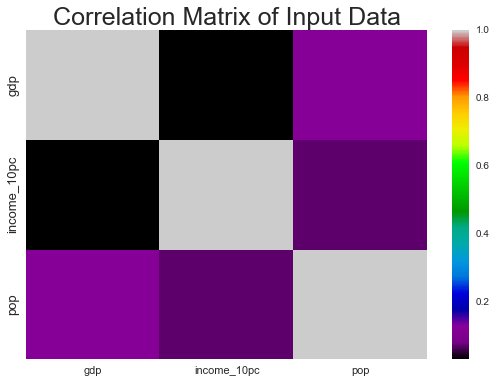

In [8]:
df_raw_corr = dat_01.corr()
sns.heatmap(df_raw_corr, cmap=plt.cm.spectral)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.title('Correlation Matrix of Input Data',fontsize=25)

In [9]:
dat_01.columns

Index(['country', 'year', 'gdp', 'income_10pc', 'pop'], dtype='object')

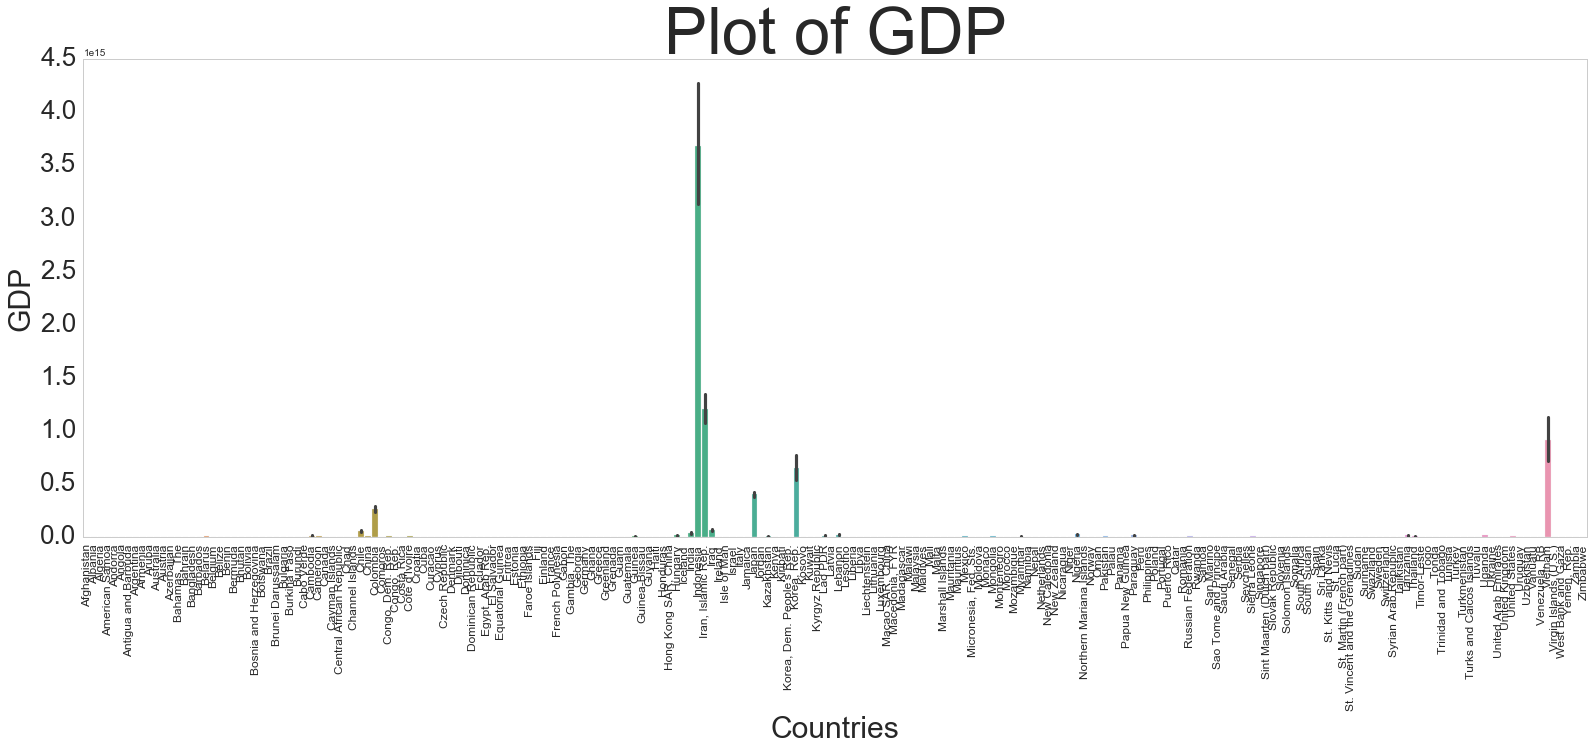

In [10]:
plt.figure(figsize=(24,8))

sns.barplot(dat_01['country'],dat_01['gdp'])
g = plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=26)
plt.xlabel("Countries",fontsize=30)
plt.ylabel("GDP",fontsize=30)
plt.title("Plot of GDP", fontsize=65)

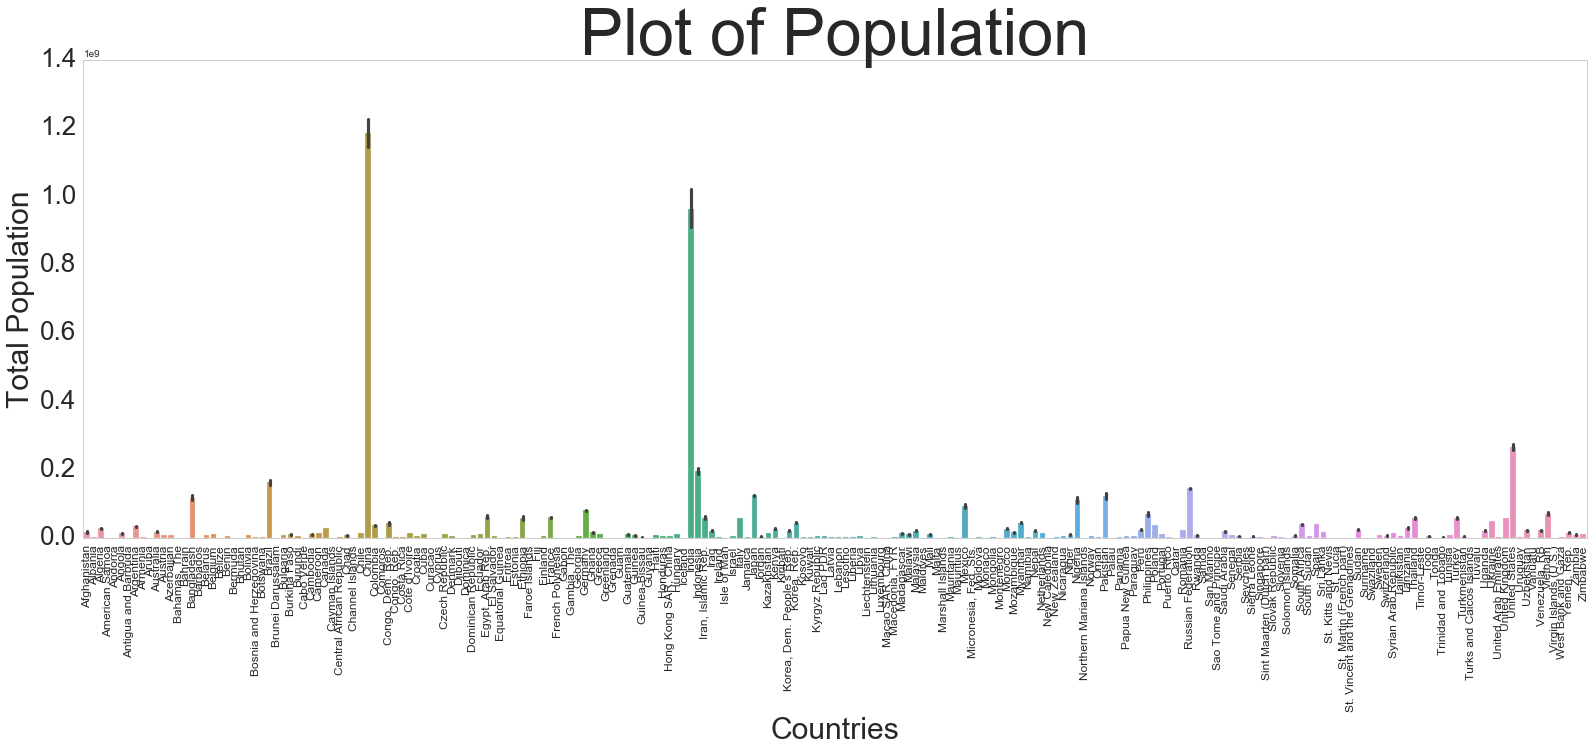

In [11]:
plt.figure(figsize=(24,8))

sns.barplot(dat_01['country'],dat_01['pop'])
g = plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=26)
plt.xlabel("Countries",fontsize=30)
plt.ylabel("Total Population",fontsize=30)
plt.title("Plot of Population", fontsize=65)

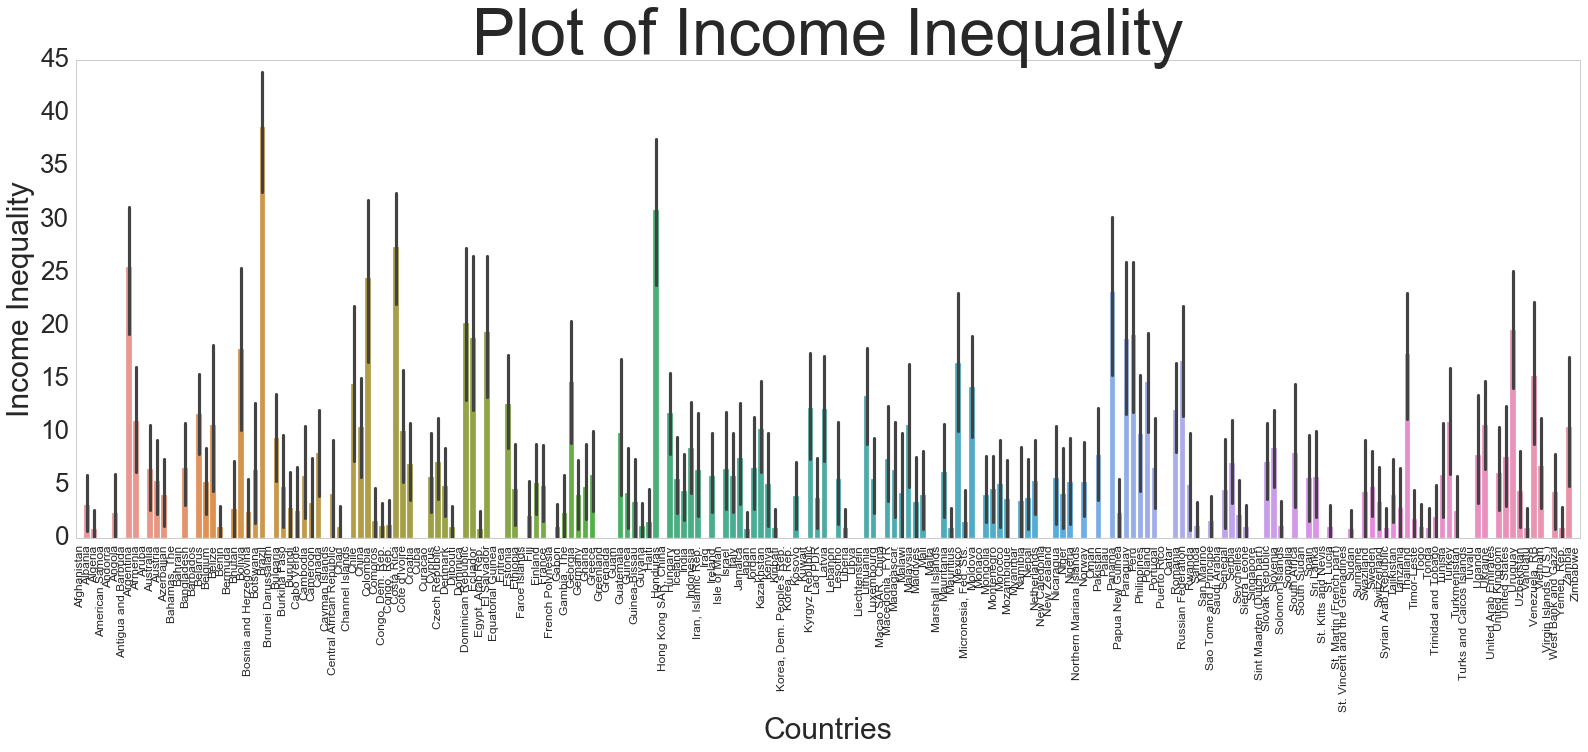

In [12]:
plt.figure(figsize=(24,8))

sns.barplot(dat_01['country'],dat_01['income_10pc'])
g = plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=26)
plt.xlabel("Countries",fontsize=30)
plt.ylabel("Income Inequality",fontsize=30)
plt.title("Plot of Income Inequality", fontsize=65)

## Percentage Change 

In [13]:
pct_change_10 = dat.pct_change(periods=10).fillna(0)
pct_change_10.reset_index(inplace=True)
pct_change_10 = pct_change_10[pct_change_10['country'].isin(country_name)]
pct_change_10.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)
pct_change_10.columns = ['country','year','gdp_pctchg_10', 'inc_pctchg_10','pop_pctchg_10']
pct_change_10.head()

,country,year,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10
1054,Afghanistan,2010,0.0,0.0,-0.994615
1055,Afghanistan,2009,0.0,0.0,-0.994669
1056,Afghanistan,2008,0.0,0.0,-0.994710
1057,Afghanistan,2007,0.0,0.0,-0.994748
1058,Afghanistan,2006,0.0,0.0,-0.994798


In [14]:
pct_change_30 = dat.pct_change(periods=30).fillna(0)
pct_change_30.reset_index(inplace=True)
pct_change_30 = pct_change_30[pct_change_30['country'].isin(country_name)]
pct_change_30.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)
pct_change_30.columns = ['country','year','gdp_pctchg_30', 'inc_pctchg_30','pop_pctchg_30']
pct_change_30.head()

,country,year,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
1054,Afghanistan,2010,0.0,0.0,-0.995913
1055,Afghanistan,2009,0.0,0.0,-0.995974
1056,Afghanistan,2008,0.0,0.0,-0.996026
1057,Afghanistan,2007,0.0,0.0,-0.996076
1058,Afghanistan,2006,0.0,0.0,-0.996134


## Standardize Data

In [15]:
from scipy.stats import *
from sklearn.preprocessing import *

In [16]:
mmscale = MinMaxScaler()

In [17]:
df_scaled = dat_01.copy()
df_mmsc = dat_01.copy()

In [18]:
df_mmsc['gdp_mmsc']=mmscale.fit_transform(df_scaled['gdp']);
df_mmsc['inc_mmsc']=mmscale.fit_transform(df_scaled['income_10pc']);
df_mmsc['pop_mmsc']=mmscale.fit_transform(df_scaled['pop']);

C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

In [19]:
df_mmsc.head()

,country,year,gdp,income_10pc,pop,gdp_mmsc,inc_mmsc,pop_mmsc
1054,Afghanistan,2010,3.688652e+11,0.0,27962207.0,0.000054,0.0,0.020903
1055,Afghanistan,2009,3.401770e+11,0.0,27207291.0,0.000050,0.0,0.020339
1056,Afghanistan,2008,2.810901e+11,0.0,26528741.0,0.000041,0.0,0.019832
1057,Afghanistan,2007,2.712927e+11,0.0,25877544.0,0.000040,0.0,0.019345
1058,Afghanistan,2006,2.385196e+11,0.0,25183615.0,0.000035,0.0,0.018826


In [20]:
df_scaled['gdp_std']=zscore(df_scaled['gdp'], ddof=1)
df_scaled['inc_std']=zscore(df_scaled['income_10pc'],   ddof=1)
df_scaled['pop_std']=zscore(df_scaled['pop'],  ddof=1)


In [21]:
df_scaled.head()

,country,year,gdp,income_10pc,pop,gdp_std,inc_std,pop_std
1054,Afghanistan,2010,3.688652e+11,0.0,27962207.0,-0.116897,-0.428581,0.013682
1055,Afghanistan,2009,3.401770e+11,0.0,27207291.0,-0.116993,-0.428581,0.006734
1056,Afghanistan,2008,2.810901e+11,0.0,26528741.0,-0.117190,-0.428581,0.000489
1057,Afghanistan,2007,2.712927e+11,0.0,25877544.0,-0.117222,-0.428581,-0.005505
1058,Afghanistan,2006,2.385196e+11,0.0,25183615.0,-0.117332,-0.428581,-0.011892


## Calculate Attributes 

In [22]:
df_scaled.drop(['gdp','income_10pc','pop'], axis=1, inplace=True)

In [23]:
df_mmsc.drop(['gdp','income_10pc','pop'], axis=1, inplace=True)

In [24]:
df_scaled['inc_gdp'] = df_scaled.iloc[:,3]/df_scaled.iloc[:,2]
df_scaled['inc_pop'] = df_scaled.iloc[:,3]/df_scaled.iloc[:,4]
df_scaled['gdp_pop'] = df_scaled.iloc[:,2]/df_scaled.iloc[:,4]
df_scaled['inc_gdp_pop']=df_scaled.iloc[:,3]/(df_scaled.iloc[:,2]+df_scaled.iloc[:,4])

In [25]:
df_scaled.head()

,country,year,gdp_std,inc_std,pop_std,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
1054,Afghanistan,2010,-0.116897,-0.428581,0.013682,3.666301,-31.323804,-8.543707,4.152309
1055,Afghanistan,2009,-0.116993,-0.428581,0.006734,3.663305,-63.643726,-17.373307,3.887042
1056,Afghanistan,2008,-0.117190,-0.428581,0.000489,3.657150,-876.943076,-239.788671,3.672465
1057,Afghanistan,2007,-0.117222,-0.428581,-0.005505,3.656131,77.854934,21.294350,3.492137
1058,Afghanistan,2006,-0.117332,-0.428581,-0.011892,3.652728,36.040173,9.866647,3.316587


In [26]:
df_mmsc['inc_gdp'] = df_mmsc.iloc[:,3]/df_mmsc.iloc[:,2]
df_mmsc['inc_pop'] = df_mmsc.iloc[:,3]/df_mmsc.iloc[:,4]
df_mmsc['gdp_pop'] = df_mmsc.iloc[:,2]/df_mmsc.iloc[:,4]
df_mmsc['inc_gdp_pop']=df_mmsc.iloc[:,3]/(df_mmsc.iloc[:,2]+df_mmsc.iloc[:,4])

In [27]:
df_mmsc.head()

,country,year,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
1054,Afghanistan,2010,0.000054,0.0,0.020903,0.0,0.0,0.002571,0.0
1055,Afghanistan,2009,0.000050,0.0,0.020339,0.0,0.0,0.002437,0.0
1056,Afghanistan,2008,0.000041,0.0,0.019832,0.0,0.0,0.002065,0.0
1057,Afghanistan,2007,0.000040,0.0,0.019345,0.0,0.0,0.002043,0.0
1058,Afghanistan,2006,0.000035,0.0,0.018826,0.0,0.0,0.001846,0.0


## Plot Attributes and Indicators

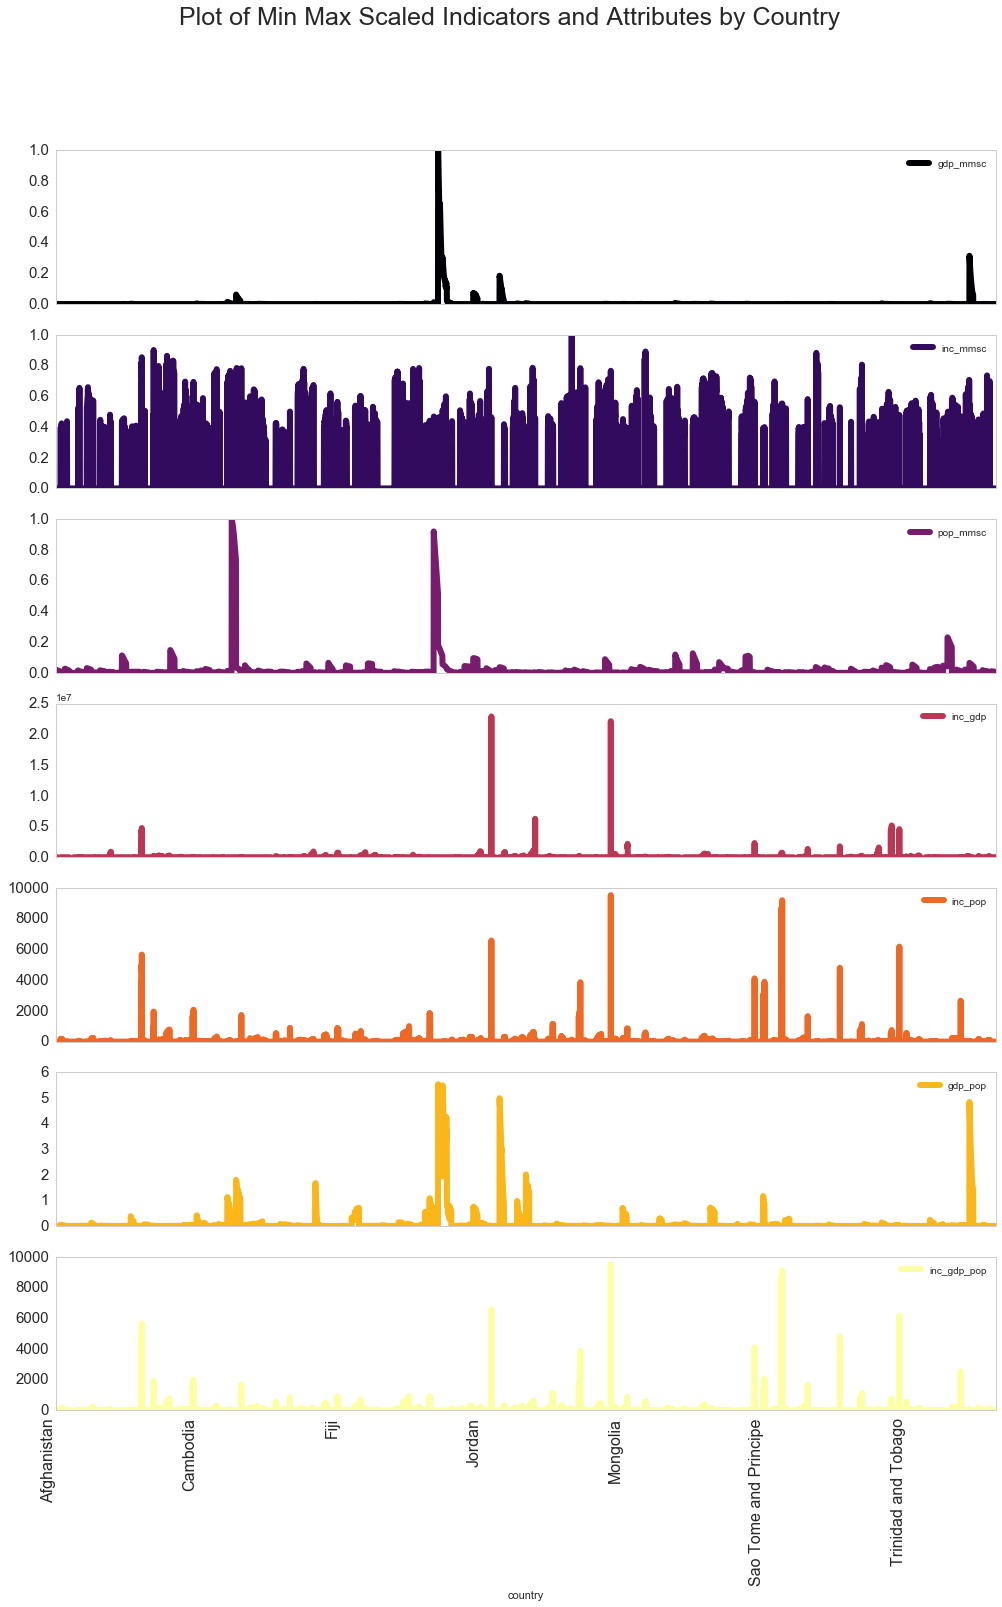

In [28]:
df_mmsc.plot(subplots=True, sharex=True, colormap=plt.cm.inferno, kind='line',x='country',
           linewidth=6, fontsize=15, figsize=(15,25))
plt.suptitle("Plot of Min Max Scaled Indicators and Attributes by Country", fontsize=25)
g = plt.xticks(rotation='vertical', fontsize=16)

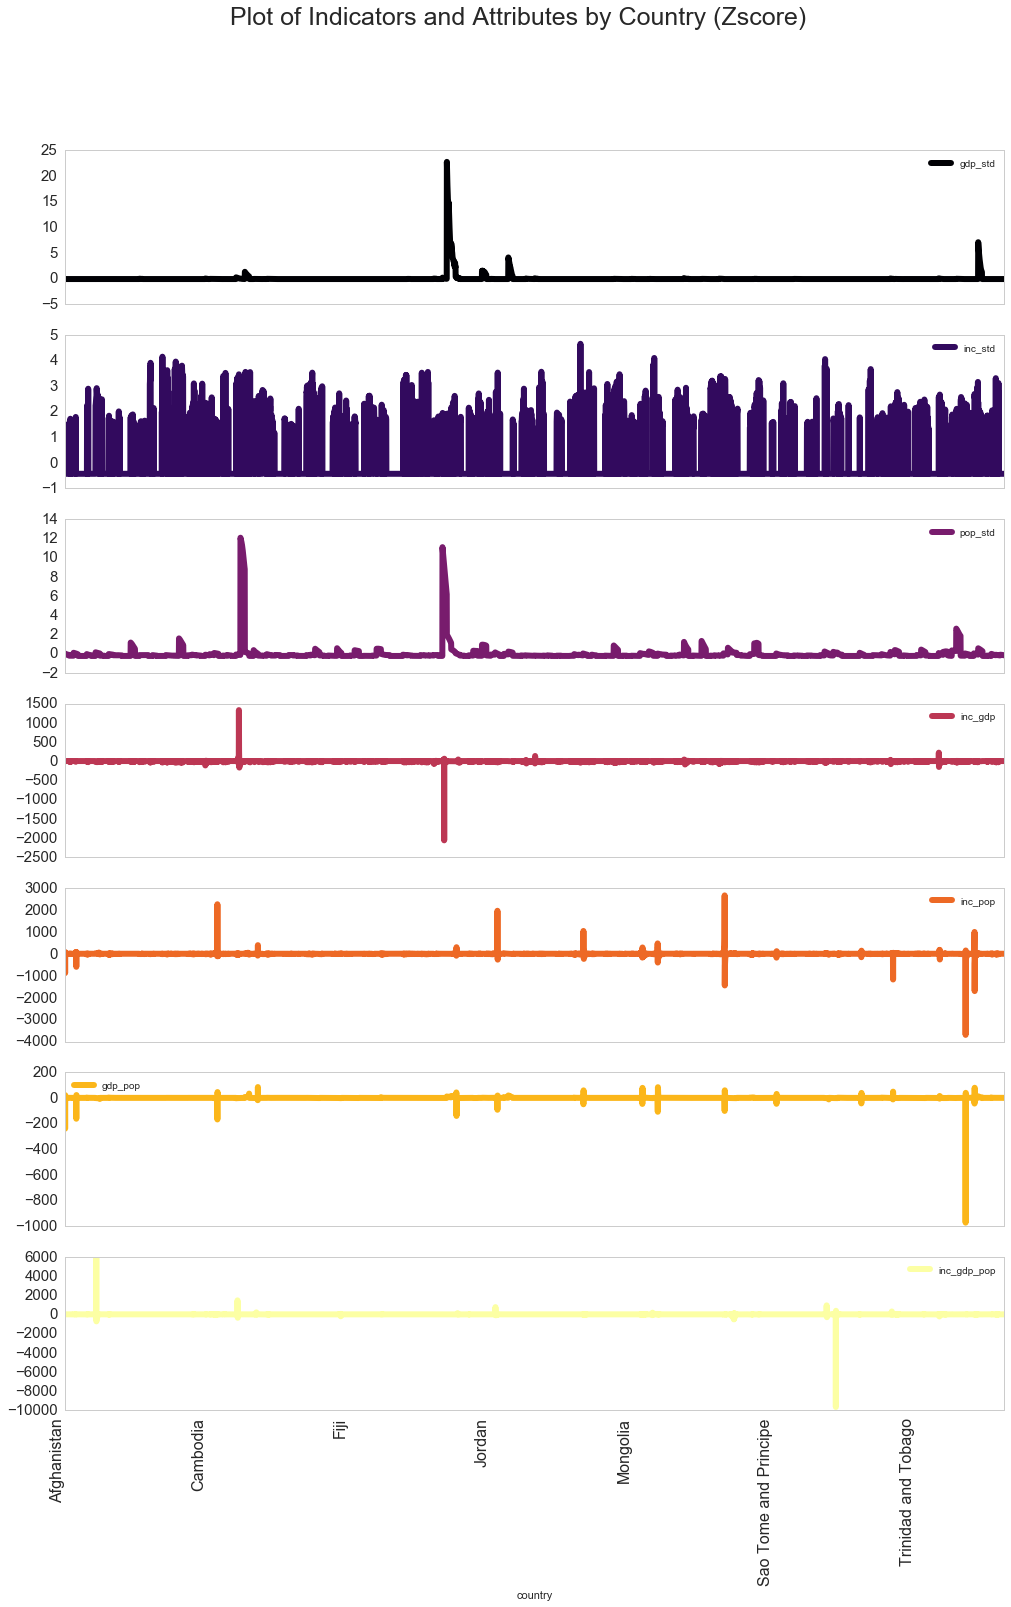

In [29]:
df_scaled.plot(subplots=True, sharex=True, colormap=plt.cm.inferno, kind='line',x='country',
           linewidth=6, fontsize=15, figsize=(15,25))
plt.suptitle("Plot of Indicators and Attributes by Country (Zscore)", fontsize=25)
g = plt.xticks(rotation='vertical', fontsize=16)

## Aggregate by Country

In [30]:
group_ctry = df_scaled.groupby('country').mean()
group_ctry.reset_index(inplace=True)
group_ctry.head()

,country,gdp_std,inc_std,pop_std,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
0,Afghanistan,-0.117878,-0.428581,-0.082023,3.635853,-22.759294,-6.213368,2.324785
1,Albania,-0.116763,-0.172747,-0.215660,1.473536,0.801290,0.541452,0.519032
2,Algeria,-0.117305,-0.356965,0.016156,3.043588,-17.339795,-5.625941,4.676528
3,American Samoa,-0.118127,-0.428581,-0.243221,3.628148,1.762101,0.485675,1.186061
4,Andorra,-0.118122,-0.428581,-0.243112,3.628293,1.762896,0.485875,1.186436


In [31]:
group_pctchg_10 = pct_change_10.groupby('country').mean()
group_pctchg_10.reset_index(inplace=True)
group_pctchg_10.head()

,country,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10
0,Afghanistan,-0.290323,0.000000,-0.507974
1,Albania,-0.090475,-0.129032,-0.246225
2,Algeria,-0.172897,-0.032258,3.254143
3,American Samoa,-0.322581,0.000000,-0.437900
4,Andorra,-0.207626,0.000000,0.177983


In [32]:
group_colname = list(group_ctry.merge(group_pctchg_10, on='country', how='outer').columns)
group_colname[8]='gdp_pctchg_10'
group_colname[9]='inc_pctchg_10'
group_colname[10]='pop_pctchg_10'

In [33]:
group_pctchg_30 = pct_change_30.groupby('country').mean()
group_pctchg_30.reset_index(inplace=True)
group_pctchg_30.head()

,country,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,-0.032258,0.000000,-0.981790
1,Albania,0.361227,0.000000,-0.782244
2,Algeria,-0.369017,-0.129032,8.068858
3,American Samoa,-0.967742,-0.032258,-0.979433
4,Andorra,-0.018179,0.000000,0.223584


In [34]:
group_pctchg_30.columns = ['country','gdp_pctchg_30', 'inc_pctchg_30','pop_pctchg_30']

In [35]:
group_pctchg_30.columns

Index(['country', 'gdp_pctchg_30', 'inc_pctchg_30', 'pop_pctchg_30'], dtype='object')

In [36]:
group_ctry_merge = group_ctry.merge(group_pctchg_10, on='country', how='outer')
group_ctry_merge.columns = group_colname
group_ctry_merge = group_ctry_merge.merge(group_pctchg_30,on='country', how='outer')

In [37]:
group_ctry_merge.head()

,country,gdp_std,inc_std,pop_std,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,-0.117878,-0.428581,-0.082023,3.635853,-22.759294,-6.213368,2.324785,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790
1,Albania,-0.116763,-0.172747,-0.215660,1.473536,0.801290,0.541452,0.519032,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244
2,Algeria,-0.117305,-0.356965,0.016156,3.043588,-17.339795,-5.625941,4.676528,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858
3,American Samoa,-0.118127,-0.428581,-0.243221,3.628148,1.762101,0.485675,1.186061,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433
4,Andorra,-0.118122,-0.428581,-0.243112,3.628293,1.762896,0.485875,1.186436,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584


## Min Max Scaling

In [38]:
group_ctry_mmsc = df_mmsc.groupby('country').mean().fillna(0)
group_ctry_mmsc.reset_index(inplace=True)
group_ctry_mmsc.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000


In [39]:
group_ctry_merge_mmsc = group_ctry_mmsc.merge(group_pctchg_10, on='country', how='outer')
group_ctry_merge_mmsc = group_ctry_merge_mmsc.merge(group_pctchg_30, on='country', how='outer')
group_ctry_merge_mmsc.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584


## Aggregate By Year 

In [40]:
group_year = df_scaled.groupby('year').mean()
group_year.reset_index(inplace=True)
group_year.head()

,year,gdp_std,inc_std,pop_std,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
0,1980,-0.071578,-0.428581,-0.053942,3.570852,3.176064,1.116007,1.292095
1,1981,-0.069841,-0.316725,-0.050607,2.608481,0.366005,0.614847,0.943856
2,1982,-0.066512,-0.410745,-0.047142,3.424399,1.558534,0.674092,1.552215
3,1983,-0.062443,-0.392169,-0.043650,3.089611,1.770368,0.706892,1.836719
4,1984,-0.054234,-0.332157,-0.040170,2.664531,1.367647,0.750359,1.195585


In [41]:
group_pctchg_10_yr = pct_change_10.groupby('year').mean()
group_pctchg_10_yr.reset_index(inplace=True)
group_pctchg_10_yr.head()

,year,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10
0,1980,-0.300212,-0.070093,-0.179718
1,1981,-0.282964,-0.060693,-0.177377
2,1982,-0.271954,-0.134744,-0.172741
3,1983,-0.269748,-0.126374,-0.169162
4,1984,-0.257627,-0.112655,-0.165122


In [42]:
group_pctchg_30_yr = pct_change_30.groupby('year').mean()
group_pctchg_30_yr.reset_index(inplace=True)
group_pctchg_30_yr.head()

,year,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,1980,-0.609114,-0.364486,-0.365175
1,1981,55.974168,0.000000,41.460283
2,1982,77.936685,-0.042056,41.654573
3,1983,77.495043,-0.004673,41.815405
4,1984,143.524009,-0.009493,41.998991


In [43]:
group_yr_merge = group_year.merge(group_pctchg_10_yr, on='year', how='outer')
group_yr_col = list(group_year.merge(group_pctchg_10_yr, on='year', how='outer'))
group_yr_col[8]='gdp_pctchg_10'
group_yr_col[9]='inc_pctchg_10'
group_yr_col[10]='pop_pctchg_10'
group_yr_merge.columns = group_yr_col
group_yr_merge.head()

,year,gdp_std,inc_std,pop_std,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10
0,1980,-0.071578,-0.428581,-0.053942,3.570852,3.176064,1.116007,1.292095,-0.300212,-0.070093,-0.179718
1,1981,-0.069841,-0.316725,-0.050607,2.608481,0.366005,0.614847,0.943856,-0.282964,-0.060693,-0.177377
2,1982,-0.066512,-0.410745,-0.047142,3.424399,1.558534,0.674092,1.552215,-0.271954,-0.134744,-0.172741
3,1983,-0.062443,-0.392169,-0.043650,3.089611,1.770368,0.706892,1.836719,-0.269748,-0.126374,-0.169162
4,1984,-0.054234,-0.332157,-0.040170,2.664531,1.367647,0.750359,1.195585,-0.257627,-0.112655,-0.165122


## Aggregate by Year : Min Max Scaling

In [44]:
group_year_mmsc = df_mmsc.groupby('year').mean()
group_year_mmsc.reset_index(inplace=True)
group_year_mmsc.head()

,year,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop
0,1980,0.002035,0.000000,0.015411,0.000000,0.000000,0.064494,0.000000
1,1981,0.002111,0.022033,0.015682,1459.795359,3.328206,0.065864,3.232529
2,1982,0.002256,0.003513,0.015963,44.548152,0.037222,0.069279,0.037179
3,1983,0.002434,0.007172,0.016247,57.156201,0.065941,0.070782,0.065790
4,1984,0.002793,0.018993,0.016529,390.960623,1.100246,0.078439,1.067466


In [45]:
group_pctchg_30_yr = pct_change_30.groupby('year').mean()
group_pctchg_30_yr.reset_index(inplace=True)
group_pctchg_30_yr.head()

,year,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,1980,-0.609114,-0.364486,-0.365175
1,1981,55.974168,0.000000,41.460283
2,1982,77.936685,-0.042056,41.654573
3,1983,77.495043,-0.004673,41.815405
4,1984,143.524009,-0.009493,41.998991


In [46]:
group_yr_merge_mmsc = group_year_mmsc.merge(group_pctchg_30_yr, on='year', how='outer')
group_yr_col = list(group_year_mmsc.merge(group_pctchg_30_yr, on='year', how='outer'))
group_yr_col[8]='gdp_pctchg_30'
group_yr_col[9]='inc_pctchg_30'
group_yr_col[10]='pop_pctchg_30'
group_yr_merge_mmsc.columns = group_yr_col
group_yr_merge_mmsc.head()

,year,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,1980,0.002035,0.000000,0.015411,0.000000,0.000000,0.064494,0.000000,-0.609114,-0.364486,-0.365175
1,1981,0.002111,0.022033,0.015682,1459.795359,3.328206,0.065864,3.232529,55.974168,0.000000,41.460283
2,1982,0.002256,0.003513,0.015963,44.548152,0.037222,0.069279,0.037179,77.936685,-0.042056,41.654573
3,1983,0.002434,0.007172,0.016247,57.156201,0.065941,0.070782,0.065790,77.495043,-0.004673,41.815405
4,1984,0.002793,0.018993,0.016529,390.960623,1.100246,0.078439,1.067466,143.524009,-0.009493,41.998991


In [47]:
len(group_ctry_merge_mmsc)

214

## Correlation Matrix of Merged Scaled Data 

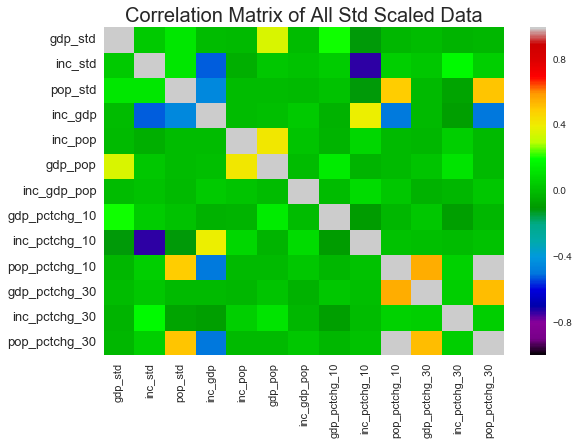

In [48]:
df_scaled_corr = group_ctry_merge.corr()
sns.heatmap(df_scaled_corr, cmap=plt.cm.spectral)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.title('Correlation Matrix of All Std Scaled Data',fontsize=20)

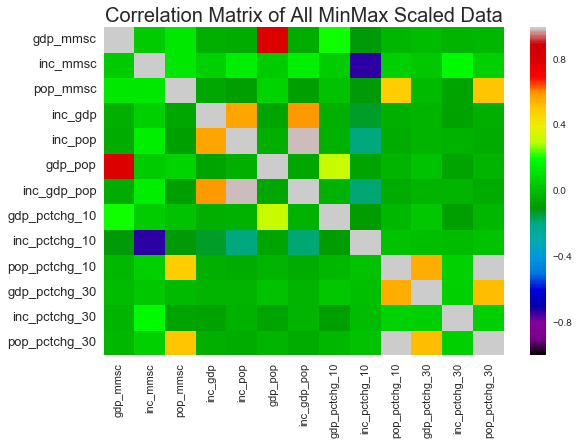

In [49]:
df_mmsc_corr = group_ctry_merge_mmsc.corr()
sns.heatmap(df_mmsc_corr, cmap=plt.cm.spectral)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.title('Correlation Matrix of All MinMax Scaled Data',fontsize=20)

# Write out scaled data

---

In [50]:
df_scaled.to_excel('scaled_data.xlsx')
group_ctry_merge.to_excel('scaled_group_country_merged.xlsx')
group_yr_merge.to_excel('scaled_group_year_merged.xlsx')

In [51]:
group_ctry_merge_mmsc.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)
group_yr_merge_mmsc.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)

In [52]:
df_mmsc.to_excel('mmscaled_data.xlsx')
group_ctry_merge_mmsc.to_excel('mmscaled_group_country_merged.xlsx')
group_yr_merge_mmsc.to_excel('mmscaled_group_year_merged.xlsx')

In [53]:
group_ctry_merge_mmsc.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)

In [54]:
group_ctry_merge_mmsc.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584


# Clustering: Kmeans, k = 3

In [55]:
from sklearn.cluster import *

In [56]:
data = pd.read_excel('mmscaled_group_country_merged_nooutlier.xlsx')

In [57]:
X = np.asarray(data.iloc[:,1:])

In [58]:
X.shape[1], X.shape[0]

(13, 214)

In [59]:
kmeans3 = KMeans(n_clusters=3).fit(X)

In [60]:
clusassign = kmeans3.predict(X)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(2)

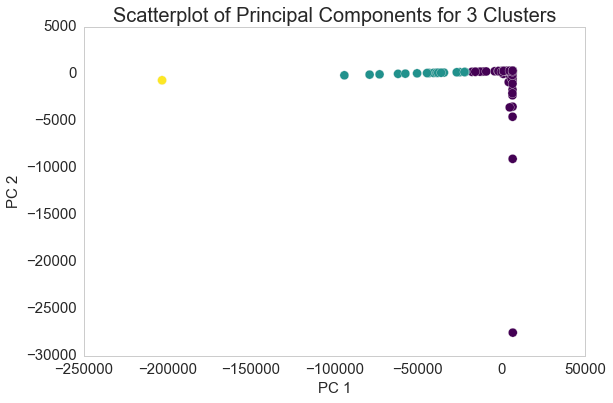

In [62]:
plot_columns = pca.fit_transform(X)
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=kmeans3.labels_,s=80, cmap=plt.cm.viridis)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title("Scatterplot of Principal Components for 3 Clusters", fontsize=20)
plt.grid(False)

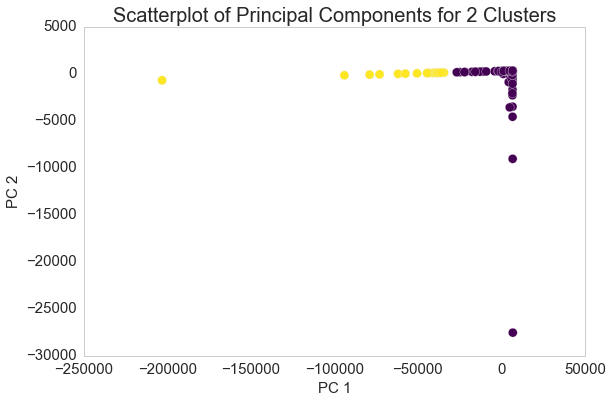

In [63]:
kmeans2 = KMeans(n_clusters=2).fit(X)
plot_columns = pca.fit_transform(X)
plt.scatter(plot_columns[:,0],plot_columns[:,1],c=kmeans2.labels_,s=80, cmap=plt.cm.viridis)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title("Scatterplot of Principal Components for 2 Clusters", fontsize=20)
plt.grid(False)

In [64]:
idx_sort = np.argsort(kmeans3.labels_)

In [65]:
[idx_sort]

[array([  0, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 149, 150, 151, 152, 130, 129, 128, 127,
        103, 105, 212, 107, 109, 110, 111, 112, 113, 114, 153, 115, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 116, 102, 154, 156,
        188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201,
        202, 203, 204, 205, 206, 208, 209, 211, 186, 185, 184, 183, 157,
        158, 160, 161, 162, 163, 164, 166, 167, 168, 155, 169, 172, 173,
        174, 175, 176, 177, 179, 180, 181, 182, 170, 101, 106,  99,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46, 100,  48,  27,  26,  25,  24,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  49,  11,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  12,  51,  47,  53,  75,  76,
         52,  78,  79,  80,  83,  84,  85,  86,  74,  87,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  88,  73

In [66]:
kmeans3.labels_[idx_sort]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2])

In [67]:
group_ctry_merge_mmsc['country'][idx_sort]

0                   Afghanistan
131                     Morocco
132                  Mozambique
133                     Myanmar
134                     Namibia
135                       Nepal
136                 Netherlands
137               New Caledonia
138                 New Zealand
139                   Nicaragua
140                       Niger
141                     Nigeria
142    Northern Mariana Islands
143                      Norway
144                        Oman
145                    Pakistan
146                       Palau
147                      Panama
149                    Paraguay
150                        Peru
151                 Philippines
152                      Poland
130                  Montenegro
129                    Mongolia
128                      Monaco
127                     Moldova
103                      Kuwait
105                     Lao PDR
212                      Zambia
107                     Lebanon
                 ...           
54      

In [68]:
group_ctry_merge_mmsc['country'][idx_sort][:10]

0        Afghanistan
131          Morocco
132       Mozambique
133          Myanmar
134          Namibia
135            Nepal
136      Netherlands
137    New Caledonia
138      New Zealand
139        Nicaragua
Name: country, dtype: object

## Extract Cluster Labels, K = 3 

In [69]:
def printel(data):
    for i in data:
        print(i)
    

In [70]:
clust1 = group_ctry_merge_mmsc['country'][kmeans3.labels_[idx_sort] ==0]
printel(clust1[:20])

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize


In [71]:
clust2 = group_ctry_merge_mmsc['country'][kmeans3.labels_[idx_sort] ==1]
printel(clust2[:15])

Turkmenistan
Turks and Caicos Islands
Tuvalu
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan
Vanuatu
Venezuela, RB
Vietnam
Virgin Islands (U.S.)
West Bank and Gaza


In [72]:
clust3 = group_ctry_merge_mmsc['country'][kmeans3.labels_[idx_sort] ==2]
printel(clust3)

Zimbabwe


## Extract Cluster Labels, K=2

In [73]:
k2_lab = kmeans2.labels_
k2_idx_sort = np.argsort(k2_lab)
k2_clust1 = group_ctry_merge_mmsc['country'][k2_lab[k2_idx_sort]==0]
k2_clust2 = group_ctry_merge_mmsc['country'][k2_lab[k2_idx_sort]==1]

printel(k2_clust1[:20])

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize


In [74]:
printel(k2_clust2)

Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan
Vanuatu
Venezuela, RB
Vietnam
Virgin Islands (U.S.)
West Bank and Gaza
Yemen, Rep.
Zambia
Zimbabwe


## Merge Cluster labels, k =3

In [75]:
clust_df = group_ctry_merge_mmsc.copy()

In [76]:
clust_df.reset_index(level=0, inplace=True)

In [77]:
clustlist = list(clust_df['index'])

In [78]:
labels = list(kmeans3.labels_)

In [79]:
newlist = dict(zip(clustlist, labels))

In [80]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')

In [81]:
newclus.head()

,0
0,0
1,0
2,0
3,0
4,0


In [82]:
newclus.columns = ['cluster']

In [83]:
newclus.reset_index(level=0, inplace=True)

In [84]:
merged_clust_df = pd.merge(clust_df, newclus, on='index')

In [85]:
merged_clust_df.drop(['index'], axis=1, inplace=True)

In [86]:
merged_clust_df.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30,cluster
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790,0
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244,0
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858,0
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433,0
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584,0


In [87]:
clustergrp = merged_clust_df.groupby('cluster').mean()
clustergrp_med = merged_clust_df.groupby('cluster').median()

In [88]:
print(clustergrp)

             gdp_mmsc  inc_mmsc  pop_mmsc        inc_gdp    inc_pop   gdp_pop  \
cluster                                                                         
0        5.637905e-03  0.081092  0.021240   32375.775444  33.294766  0.125180   
1        2.493957e-06  0.123919  0.004008   52972.280938  87.850786  0.001569   
2        3.720804e-07  0.065466  0.004279  209842.493945  13.004857  0.000086   

         inc_gdp_pop  gdp_pctchg_10  inc_pctchg_10  pop_pctchg_10  \
cluster                                                             
0          30.881500     183.814907      -0.119756      22.515090   
1          87.325029       0.227866      -0.141653       5.525514   
2          13.003853      -0.177839      -0.130075      -0.234401   

         gdp_pctchg_30  inc_pctchg_30  pop_pctchg_30  
cluster                                               
0          2978.537778      -0.131058      48.613579  
1            -0.146195      -0.109032      11.090743  
2            -0.932124      

In [89]:
clustergrp

,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
cluster,,,,,,,,,,,,,
0,5.637905e-03,0.081092,0.021240,32375.775444,33.294766,0.125180,30.881500,183.814907,-0.119756,22.515090,2978.537778,-0.131058,48.613579
1,2.493957e-06,0.123919,0.004008,52972.280938,87.850786,0.001569,87.325029,0.227866,-0.141653,5.525514,-0.146195,-0.109032,11.090743
2,3.720804e-07,0.065466,0.004279,209842.493945,13.004857,0.000086,13.003853,-0.177839,-0.130075,-0.234401,-0.932124,-0.032258,-0.585501


In [90]:
clustergrp.drop(['inc_gdp'], axis=1)

,gdp_mmsc,inc_mmsc,pop_mmsc,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30
cluster,,,,,,,,,,,,
0,5.637905e-03,0.081092,0.021240,33.294766,0.125180,30.881500,183.814907,-0.119756,22.515090,2978.537778,-0.131058,48.613579
1,2.493957e-06,0.123919,0.004008,87.850786,0.001569,87.325029,0.227866,-0.141653,5.525514,-0.146195,-0.109032,11.090743
2,3.720804e-07,0.065466,0.004279,13.004857,0.000086,13.003853,-0.177839,-0.130075,-0.234401,-0.932124,-0.032258,-0.585501


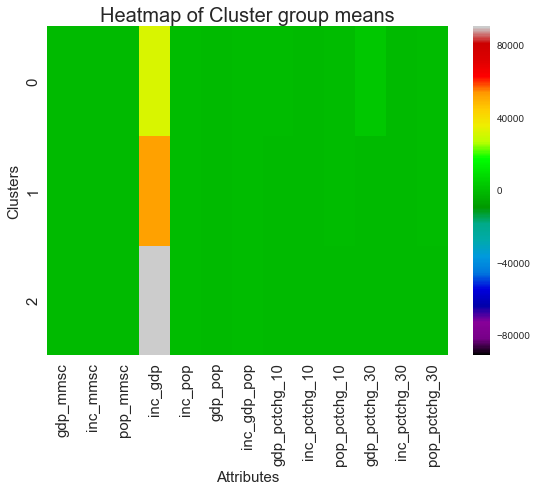

In [91]:
sns.heatmap(clustergrp, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Cluster group means", fontsize=20)

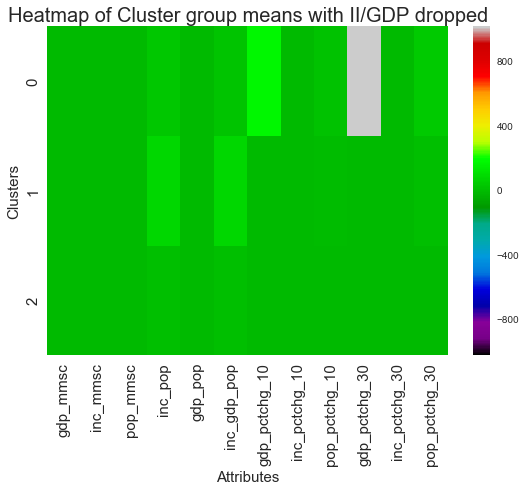

In [92]:
sns.heatmap(clustergrp.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Cluster group means with II/GDP dropped", fontsize=20)

## Write out merged cluster data

In [93]:
merged_clust_df.to_excel('merged_mmsc_cluster_ctry.xlsx')

# Affinity Propagation

In [94]:
from itertools import cycle

In [95]:
af = AffinityPropagation(preference=None).fit(X)

In [96]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

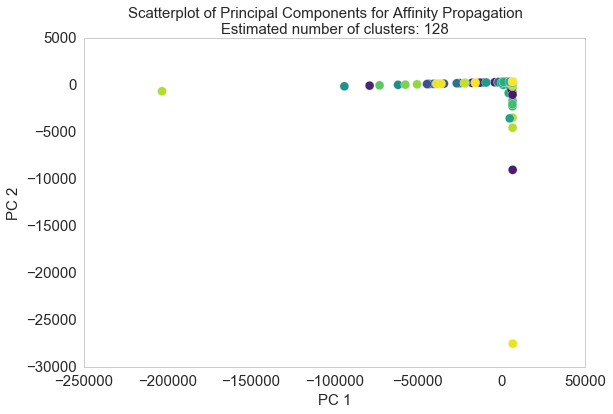

In [97]:
plot_columns = pca.fit_transform(X)
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=af.labels_,s=80, cmap=plt.cm.viridis)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.suptitle("Scatterplot of Principal Components for Affinity Propagation", fontsize=15)
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=15)
plt.grid(False)

# Spectral Clustering

In [98]:
sc = SpectralClustering().fit(X)

C:\Users\arsha_000\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [99]:
set(sc.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [139]:
country = group_ctry_merge_mmsc['country']
list(country[sc.labels_==0][:100])

['American Samoa',
 'Antigua and Barbuda',
 'Aruba',
 'Barbados',
 'Bermuda',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'Dominica',
 'Faroe Islands',
 'French Polynesia',
 'Greenland',
 'Isle of Man',
 'Malta',
 'Marshall Islands',
 'New Caledonia',
 'Northern Mariana Islands',
 'Puerto Rico',
 'San Marino',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Martin (French part)',
 'Virgin Islands (U.S.)']

In [145]:
list(country[sc.labels_==5][:100])

['Croatia', 'Jordan']

In [146]:
list(country[sc.labels_==6][:100])

['Bahamas, The', 'Tuvalu']

In [147]:
list(country[sc.labels_==7][:100])

['Bahrain', 'Cuba', 'Grenada', 'United Arab Emirates']

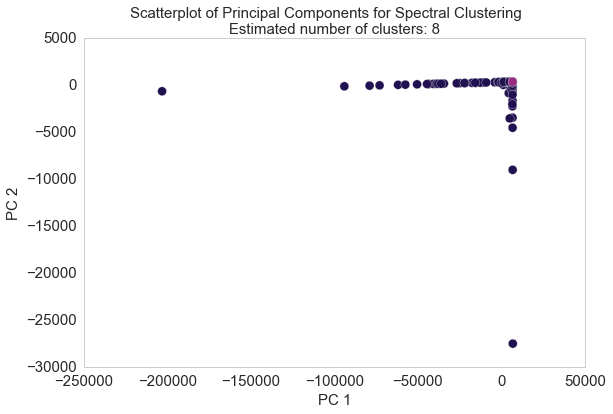

In [140]:
plot_columns = pca.fit_transform(X)
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=sc.labels_,s=80, cmap=plt.cm.magma)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.suptitle("Scatterplot of Principal Components for Spectral Clustering", fontsize=15)
plt.title('Estimated number of clusters: %d' % sc.n_clusters, fontsize=15)
plt.grid(False)

# Birch

In [103]:
brc = Birch().fit(X)

In [104]:
brc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
brc.n_clusters

3

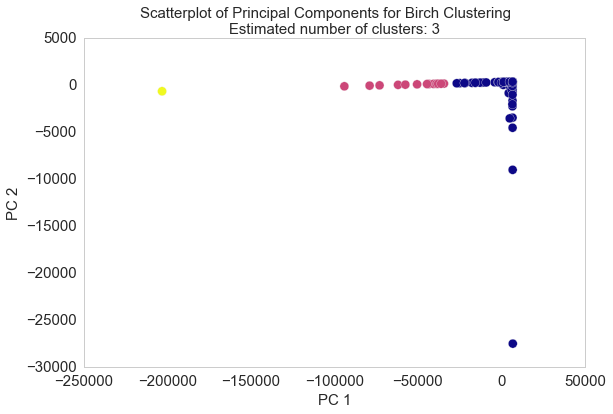

In [106]:
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=brc.labels_,s=80, cmap=plt.cm.plasma)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.suptitle("Scatterplot of Principal Components for Birch Clustering", fontsize=15)
plt.title('Estimated number of clusters: %d' % brc.n_clusters, fontsize=15)
plt.grid(False)

## Add birch labels 

In [107]:
clust_df = group_ctry_merge_mmsc.copy()

In [108]:
clust_df.reset_index(level=0, inplace=True)

In [109]:
clustlist = list(clust_df['index'])

In [110]:
labels = list(brc.labels_)

In [111]:
newlist = dict(zip(clustlist, labels))

In [112]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')

In [113]:
newclus.head()

,0
0,0
1,0
2,0
3,0
4,0


In [114]:
newclus.columns = ['cluster']

In [115]:
newclus.reset_index(level=0, inplace=True)

In [116]:
merged_clust_df = pd.merge(clust_df, newclus, on='index')

In [117]:
merged_clust_df.drop(['index'], axis=1, inplace=True)

In [118]:
merged_clust_df.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30,cluster
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790,0
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244,0
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858,0
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433,0
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584,0


In [119]:
clustergrp_brc = merged_clust_df.groupby('cluster').mean()
print(clustergrp_brc)

             gdp_mmsc  inc_mmsc  pop_mmsc        inc_gdp     inc_pop  \
cluster                                                                
0        5.525237e-03  0.082505  0.020899   32339.364362   33.330685   
1        1.877884e-06  0.115363  0.003960   59869.837732  104.084659   
2        3.720804e-07  0.065466  0.004279  209842.493945   13.004857   

          gdp_pop  inc_gdp_pop  gdp_pctchg_10  inc_pctchg_10  pop_pctchg_10  \
cluster                                                                       
0        0.122698    30.963690     180.131524      -0.119843      22.081912   
1        0.001719   103.427812       0.406973      -0.147046       6.962239   
2        0.000086    13.003853      -0.177839      -0.130075      -0.234401   

         gdp_pctchg_30  inc_pctchg_30  pop_pctchg_30  
cluster                                               
0          2918.973311      -0.132583      47.685493  
1            -0.287939      -0.078800      13.823493  
2            -0.932124 

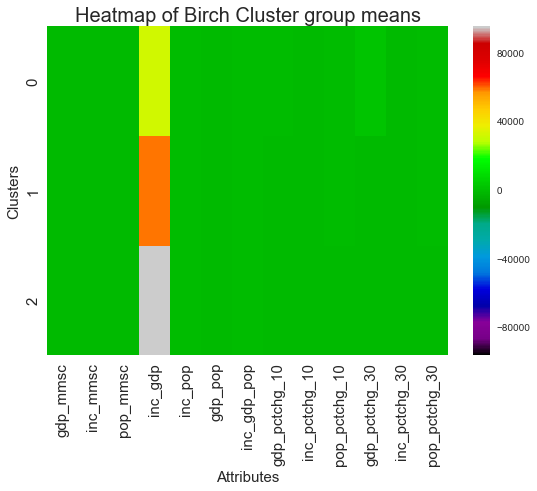

In [120]:
sns.heatmap(clustergrp_brc, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Birch Cluster group means", fontsize=20)

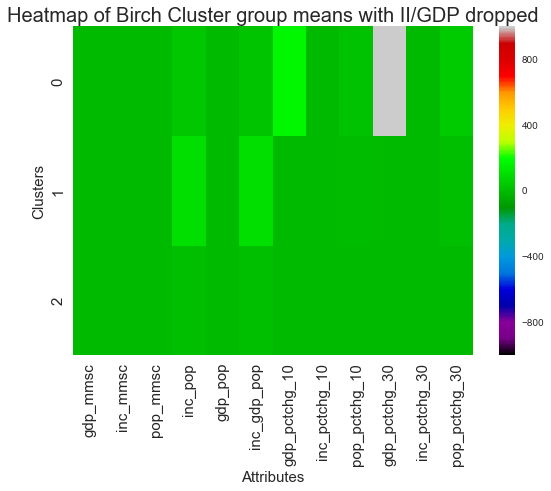

In [121]:
sns.heatmap(clustergrp_brc.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Birch Cluster group means with II/GDP dropped", fontsize=20)

In [122]:
merged_clust_df.to_excel('birch_cluster.xlsx')

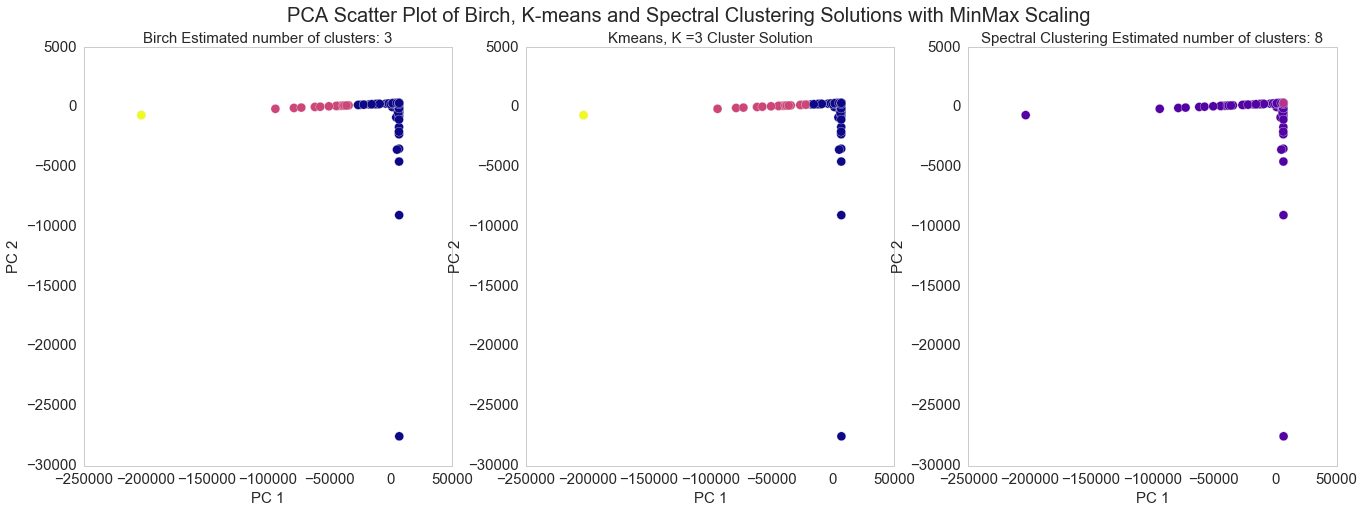

In [123]:
plt.figure(figsize=(20,7))

plt.suptitle('PCA Scatter Plot of Birch, K-means and Spectral Clustering Solutions with MinMax Scaling\n\n', fontsize=20)

plt.subplot(131)
#plot birch
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=brc.labels_,s=80, cmap=plt.cm.plasma)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title('Birch Estimated number of clusters: %d' % brc.n_clusters, fontsize=15)

plt.subplot(132)
#plot k-means
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=kmeans3.labels_,s=80, cmap=plt.cm.plasma)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title('Kmeans, K =3 Cluster Solution', fontsize=15)

plt.subplot(133)
#plot k-means
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=sc.labels_,s=80, cmap=plt.cm.plasma)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("PC 1", fontsize=15)
plt.ylabel("PC 2", fontsize=15)
plt.title('Spectral Clustering Estimated number of clusters: %d' % sc.n_clusters, fontsize=15)

# Spectral Clustering Labels

In [124]:
clust_df = group_ctry_merge_mmsc.copy()

In [125]:
clust_df.reset_index(level=0, inplace=True)

In [126]:
clustlist = list(clust_df['index'])

In [127]:
labels = list(sc.labels_)

In [128]:
newlist = dict(zip(clustlist, labels))

In [129]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')

In [130]:
newclus.head()

,0
0,2
1,1
2,1
3,0
4,3


In [131]:
newclus.columns = ['cluster']

In [132]:
newclus.reset_index(level=0, inplace=True)

In [133]:
merged_clust_df = pd.merge(clust_df, newclus, on='index')

In [134]:
merged_clust_df.drop(['index'], axis=1, inplace=True)

In [135]:
merged_clust_df.head()

,country,gdp_mmsc,inc_mmsc,pop_mmsc,inc_gdp,inc_pop,gdp_pop,inc_gdp_pop,gdp_pctchg_10,inc_pctchg_10,pop_pctchg_10,gdp_pctchg_30,inc_pctchg_30,pop_pctchg_30,cluster
0,Afghanistan,1.088299e-05,0.000000,0.013130,0.000000,0.000000,0.000577,0.000000,-0.290323,0.000000,-0.507974,-0.032258,0.000000,-0.981790,2
1,Albania,5.959362e-05,0.050394,0.002276,722.065634,22.186081,0.026379,21.485009,-0.090475,-0.129032,-0.246225,0.361227,0.000000,-0.782244,1
2,Algeria,3.591456e-05,0.014107,0.021104,447.772283,0.652864,0.001689,0.651913,-0.172897,-0.032258,3.254143,-0.369017,-0.129032,8.068858,1
3,American Samoa,0.000000e+00,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,-0.322581,0.000000,-0.437900,-0.967742,-0.032258,-0.979433,0
4,Andorra,2.066927e-07,0.000000,0.000046,0.000000,0.000000,0.004398,0.000000,-0.207626,0.000000,0.177983,-0.018179,0.000000,0.223584,3


In [136]:
clustergrp_sc = merged_clust_df.groupby('cluster').mean()
print(clustergrp_sc)

             gdp_mmsc  inc_mmsc  pop_mmsc       inc_gdp    inc_pop   gdp_pop  \
cluster                                                                        
0        2.474055e-06  0.000000  0.000399      0.000000   0.000000  0.018770   
1        6.478894e-03  0.105599  0.024655  43341.882074  47.136382  0.138532   
2        2.491305e-03  0.000000  0.007935      0.000000   0.000000  0.155463   
3        6.220514e-07  0.000000  0.002834      0.000000   0.000000  0.001533   
4        4.989224e-07  0.000000  0.000277      0.000000   0.000000  0.004791   
5        1.125378e-05  0.109937  0.003228  65622.593200  33.096890  0.003380   
6        4.508721e-07  0.000000  0.000108      0.000000   0.000000  0.002320   
7        2.203826e-05  0.000000  0.002704      0.000000   0.000000  0.011786   

         inc_gdp_pop  gdp_pctchg_10  inc_pctchg_10  pop_pctchg_10  \
cluster                                                             
0           0.000000      -0.402426      -0.011220      -0.37

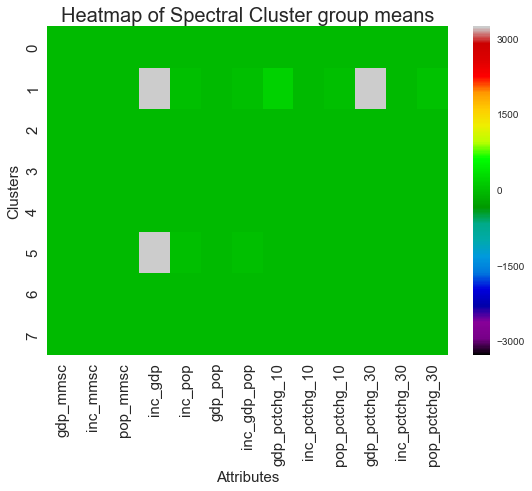

In [137]:
sns.heatmap(clustergrp_sc, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Spectral Cluster group means", fontsize=20)

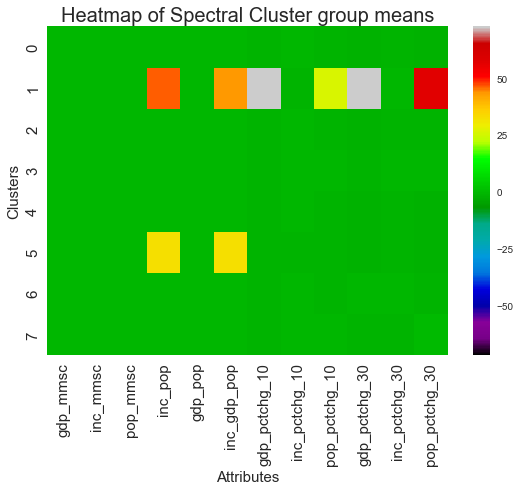

In [138]:
sns.heatmap(clustergrp_sc.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Spectral Cluster group means", fontsize=20)

# Cluster statistics

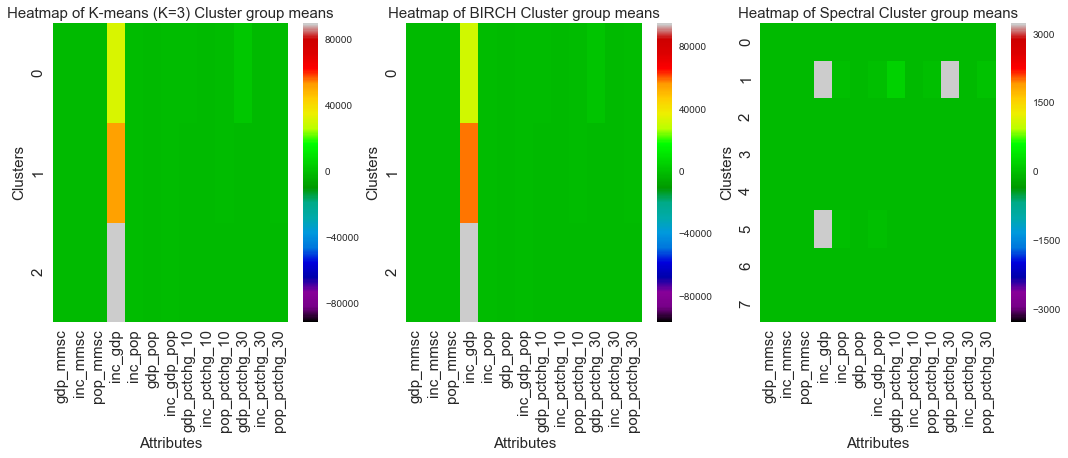

In [156]:
plt.figure(figsize=(16,5))

plt.subplot(131)
sns.heatmap(clustergrp, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of K-means (K=3) Cluster group means", fontsize=15)

plt.subplot(132)
sns.heatmap(clustergrp_brc, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of BIRCH Cluster group means", fontsize=15)

plt.subplot(133)
sns.heatmap(clustergrp_sc, center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Heatmap of Spectral Cluster group means", fontsize=15)



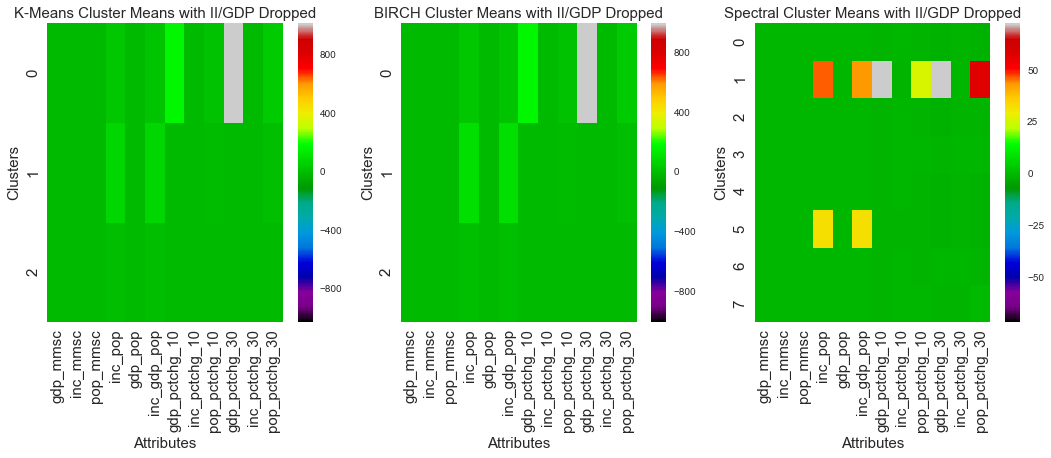

In [157]:
plt.figure(figsize=(16,5))

plt.subplot(131)
sns.heatmap(clustergrp.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("K-Means Cluster Means with II/GDP Dropped", fontsize=15)

plt.subplot(132)
sns.heatmap(clustergrp_brc.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("BIRCH Cluster Means with II/GDP Dropped", fontsize=15)

plt.subplot(133)
sns.heatmap(clustergrp_sc.drop(['inc_gdp'], axis=1), center=True, robust=True, cmap=plt.cm.spectral)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Attributes", fontsize=15)
plt.ylabel("Clusters", fontsize=15)
plt.title("Spectral Cluster Means with II/GDP Dropped", fontsize=15)